In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [4]:
col = ["Cultivator", "Alchol", "Malic_Acid", "Ash", "Alcalinity_of_Ash", "Magnesium", "Total_phenols", "Falvanoids", "Nonflavanoid_phenols", "Proanthocyanins", "Color_intensity", "Hue", "OD280", "Proline"]
wine_d = pd.read_csv("wine.csv",names=col)

In [5]:
wine_d.head()

,Cultivator,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


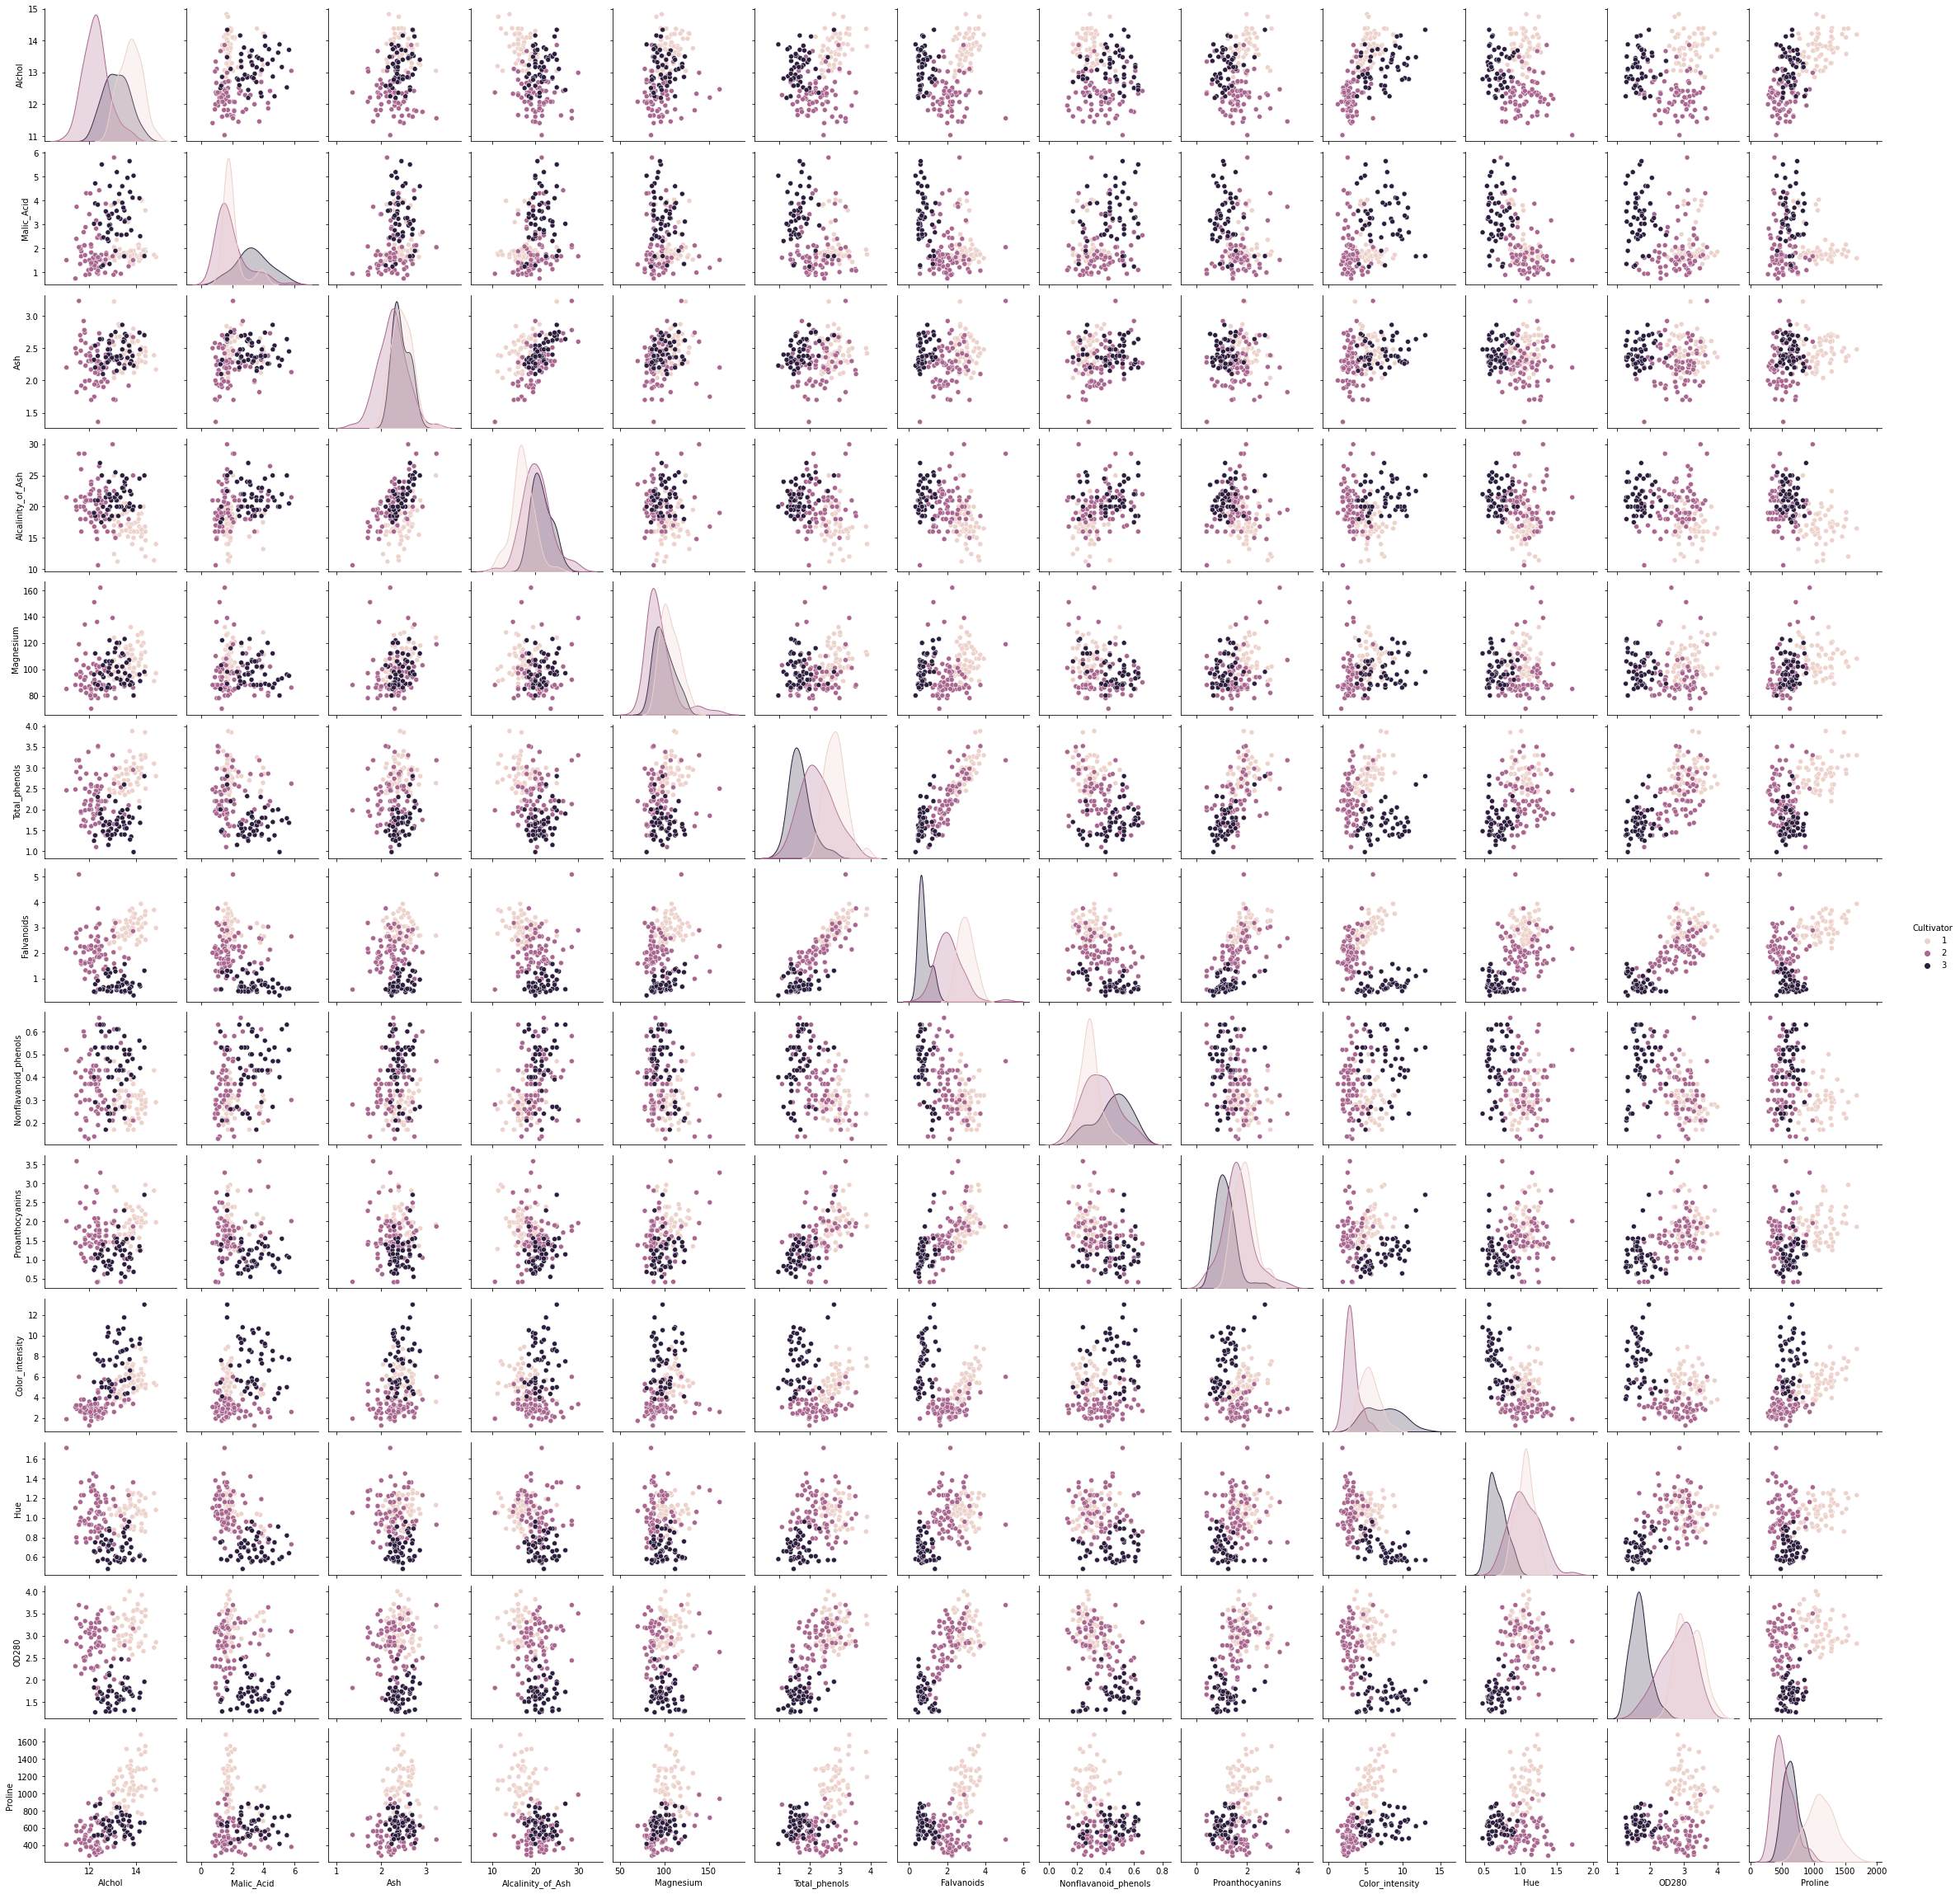

In [7]:
sns.pairplot(wine_d,hue="Cultivator",diag_kind="kde")

In [14]:
X = wine_d.iloc[:,1:]
Y = wine_d.iloc[:,0]
seed = 7
test_size=0.30

In [15]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=test_size,random_state=seed)

In [ ]:
model = LogisticRegression()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
model_score = model.score(x_test,y_test) #total accuracy 
print(model_score)
print("The Confusion Matrix:\n",metrics.confusion_matrix(y_test,y_predict))
print(metrics.classification_report(y_test,y_predict))

In [21]:
model = LogisticRegression()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
model_score = model.score(x_test,y_test)
print(model_score)
print(metrics.confusion_matrix(y_predict,y_test))
print(metrics.classification_report(y_test,y_predict))

0.9259259259259259
[[12  3  0]
 [ 1 21  0]
 [ 0  0 17]]
              precision    recall  f1-score   support

           1       0.80      0.92      0.86        13
           2       0.95      0.88      0.91        24
           3       1.00      1.00      1.00        17

    accuracy                           0.93        54
   macro avg       0.92      0.93      0.92        54
weighted avg       0.93      0.93      0.93        54



In [31]:
wine_d["Cultivator"].value_counts()

2    71
1    59
3    48
Name: Cultivator, dtype: int64

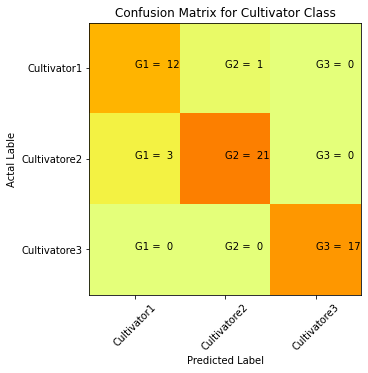

In [37]:
plt.figure(figsize=[10,5])
cm = metrics.confusion_matrix(y_test,y_predict)
plt.clf()
plt.imshow(cm,interpolation="nearest",cmap=plt.cm.Wistia)
classNames = ["Cultivator1","Cultivatore2","Cultivatore3"]
plt.title("Confusion Matrix for Cultivator Class")
plt.ylabel("Actal Lable")
plt.xlabel("Predicted Label")
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks,classNames,rotation=45)
plt.yticks(tick_marks,classNames)
s = [["G1","G2","G3"],["G1","G2","G3"],["G1","G2","G3"]]
for i in range(3):
    for j in range(3):
        plt.text(j,i,str(s[i][j])+" =  "+ str(cm[i][j]))
plt.show()